In [1]:
%matplotlib inline
from datavyz import ge
import numpy as np

In [2]:
import sys, os
sys.path.append('../')
from data.Import import LoadPairData

dataC = LoadPairData(5, condition='Control')
dataT = LoadPairData(3, condition='ZX1')

In [3]:
def normalize_trace(data,
                    bsl_time = 100, window_for_peak=[100,140]):
    zoom = data['window']
    cond = (data['t']>zoom[0]) & (data['t']<zoom[1])
    baseline_cond = (data['t']>zoom[0]) & (data['t']<zoom[0]+bsl_time)
    irk = 'Irecording'
    mean = data['recordings'][irk][:,baseline_cond].mean()
    Itrace = data['recordings'][irk].mean(axis=0)[cond]-mean
    peak_cond = (data['t'][cond]>=window_for_peak[0]+zoom[0]) & (data['t'][cond]<=window_for_peak[1]+zoom[0])
    peak = np.max(Itrace[peak_cond])
    return 1e3*peak, Itrace/peak

def pair_recording_plot_comparison(icell=0,
                                   bsl_time = 100, window_for_peak=[100,140]):
    dataC = LoadPairData(icell, condition='Control')
    dataT = LoadPairData(icell, condition='ZX1')
    zoom = dataC['window']
    # fig
    fig, AX = ge.figure(axes=(1,3), figsize=(3,3), hspace=0.1)
    cond = (dataC['t']>zoom[0]) & (dataC['t']<zoom[1])
    # free-Zinc case
    irk, vrk = 'Irecording', 'Vrecording'
    plot_cond = (dataC['stimulations']['ICommand'][cond]<=0) # blanking artefact
    peak, norm_Trace = normalize_trace(dataC, bsl_time=bsl_time, window_for_peak=window_for_peak)
    AX[0].plot(dataC['t'][cond][plot_cond], norm_Trace[plot_cond], color='k')
    AX[1].plot(dataC['t'][cond], 1e3*dataC['recordings'][irk].mean(axis=0)[cond], color='k')
    AX[2].plot(dataC['t'][cond], dataC['recordings'][vrk].mean(axis=0)[cond], label='free-Zinc', color='k')
    ge.annotate(AX[0], '%.1fpA' % peak, (zoom[0]+.8*bsl_time,.5),
                color='k', ha='right', xycoords='data', rotation=90 ,size='large')
    # chelated-Zinc case
    plot_cond = (dataT['stimulations']['ICommand'][cond]<=0) # blanking artefact
    peak, norm_Trace = normalize_trace(dataT, bsl_time=bsl_time, window_for_peak=window_for_peak)
    AX[0].plot(dataT['t'][cond][plot_cond], norm_Trace[plot_cond], color=ge.green)
    AX[1].plot(dataT['t'][cond], 1e3*dataT['recordings'][irk].mean(axis=0)[cond], color=ge.green)
    AX[2].plot(dataT['t'][cond], dataT['recordings'][vrk].mean(axis=0)[cond], color=ge.green, label='chelated-Zinc')
    AX[2].legend()
    AX[0].plot(zoom[0]+.8*bsl_time+np.zeros(2), [.5,1.], 'k-', lw=1)
    ge.annotate(AX[0], '%.1fpA\n' % (peak/2.), (zoom[0]+.8*bsl_time,.5),
                color=ge.green, ha='right', xycoords='data', rotation=90 ,size='large')
    ge.set_plot(AX[0], ['left'], ylabel='norm. I \n (+low-pass+artefact-blank)', xlim=zoom)
    ge.set_plot(AX[1], ['left'], ylabel='raw I (pA)', xlim=zoom)
    ge.set_plot(AX[2], ylabel='pre Vm (mV)', xlabel='time (ms)', xlim=zoom)
    
def pair_recording_plot(data):
    zoom = data['window']
    fig, AX = ge.figure(axes=(1,2), figsize=(3,3), hspace=0.1)
    cond = (data['t']>zoom[0]) & (data['t']<zoom[1])
    irk, vrk = 'Irecording', 'Vrecording'
    AX[0].plot(data['t'][cond], data['recordings'][irk].mean(axis=0)[cond])
    AX[1].plot(data['t'][cond], data['recordings'][vrk].mean(axis=0)[cond])
    ge.title(AX[0], os.path.basename(data['filename']))

/media/yann/DATADRIVE1/DATA/Data_Nunzio/2019/July/nm18Jul2019c0/nm18Jul2019c0_002.h5    limited to 34 sweeps


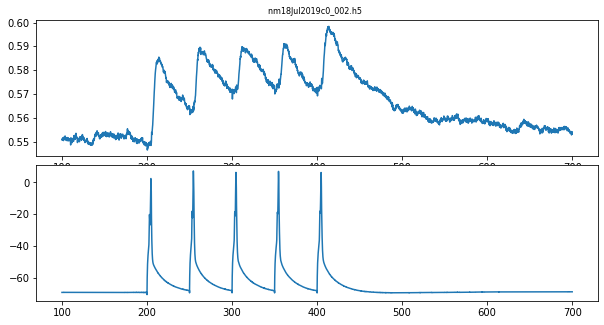

In [4]:
data = LoadPairData(0, condition='ZX1')
pair_recording_plot(data)

In [5]:
data['stimulations']

{'ICommand': array([ 5.2452087e-06, -6.6757202e-06,  1.3346893e-05, ...,
        -4.7839717e-06,  0.0000000e+00,  0.0000000e+00], dtype=float32)}

/media/yann/DATADRIVE1/DATA/Data_Nunzio/2019/July/nm18Jul2019c0/nm18Jul2019c0_002.h5    limited to 34 sweeps
/media/yann/DATADRIVE1/DATA/Data_Nunzio/2018/July/nm02Jul2018c17/nm02Jul2018c17_003.h5    limited to 20 sweeps


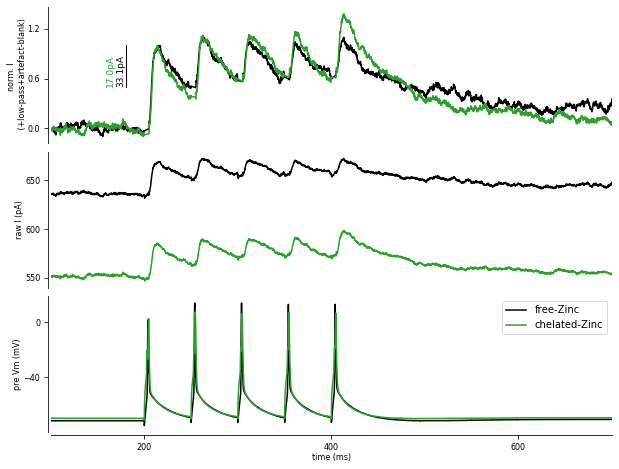

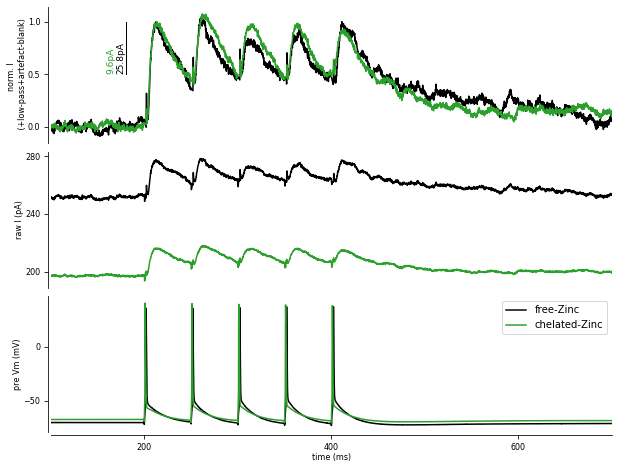

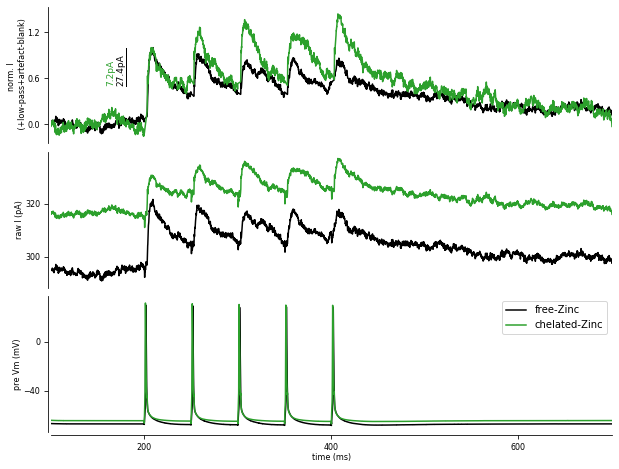

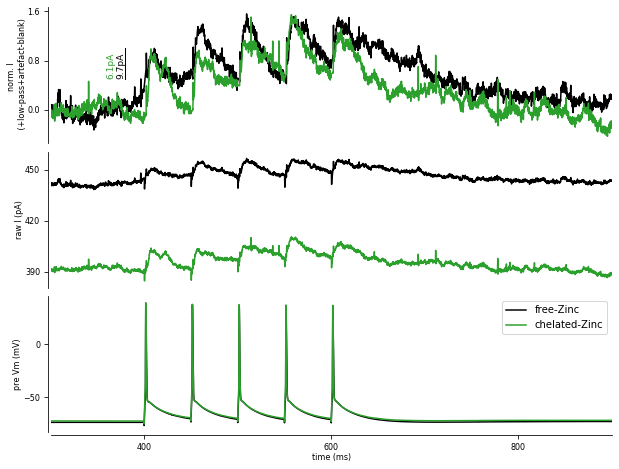

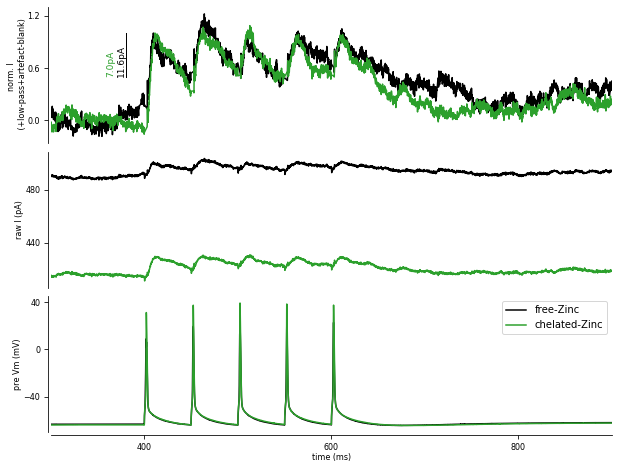

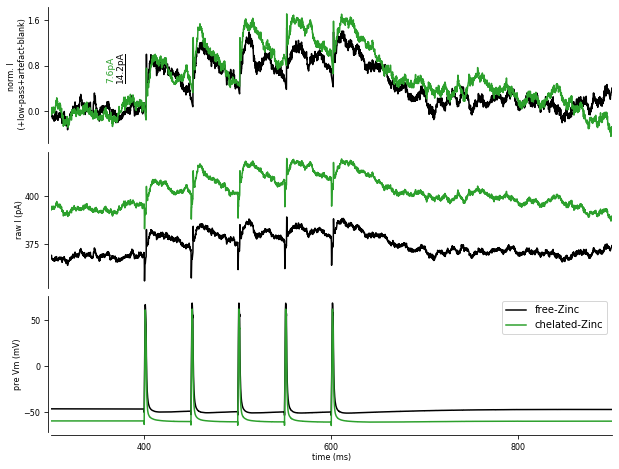

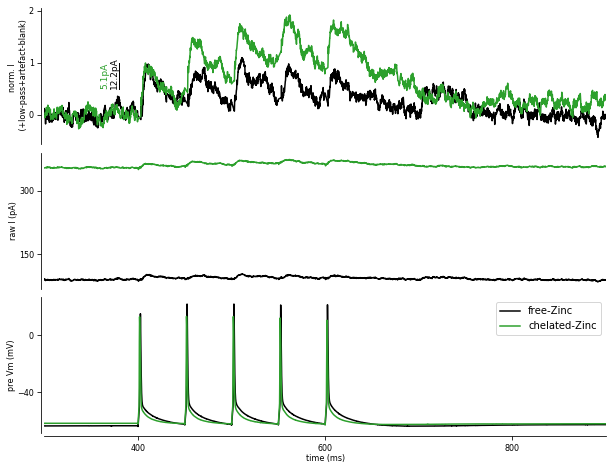

In [6]:
from data.exp_datasets import L23L23_PAIRS_DATASET
for i in range(len(L23L23_PAIRS_DATASET)):
    pair_recording_plot_comparison(icell=i)

/media/yann/DATADRIVE1/DATA/Data_Nunzio/2019/July/nm18Jul2019c0/nm18Jul2019c0_002.h5    limited to 34 sweeps
/media/yann/DATADRIVE1/DATA/Data_Nunzio/2018/July/nm02Jul2018c17/nm02Jul2018c17_003.h5    limited to 20 sweeps


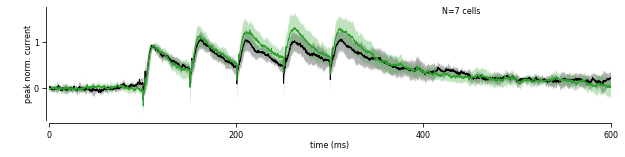

In [7]:


def pair_recording_summary_comparison(zoom=[0, 600],
                                      bsl_time = 100, window_for_peak=[100,140]):

    FreeZinc, ChelatedZinc =[], []
    FreeZinc_peaks, ChelatedZinc_peaks =[], []
    
    for icell in range(len(L23L23_PAIRS_DATASET)):

 
        dataC = LoadPairData(icell, condition='Control')
        cond = (dataC['t']>zoom[0]) & (dataC['t']<zoom[1])
        #plot_cond = (dataC['stimulations'][dataC['Icmd_key']][cond]<=0) # blanking artefact
        peak, norm_Trace = normalize_trace(dataC, bsl_time=bsl_time, window_for_peak=window_for_peak)
        FreeZinc.append(norm_Trace)
        FreeZinc_peaks.append(peak)

        dataT = LoadPairData(icell, condition='ZX1')        
        peak, norm_Trace = normalize_trace(dataT, bsl_time=bsl_time, window_for_peak=window_for_peak)
        ChelatedZinc.append(norm_Trace)
        ChelatedZinc_peaks.append(peak)
        
       
    t = dataT['t'][cond]#[plot_cond]
    fig, ax = ge.figure(figsize=(3,2.5))
    
    ax.plot(-.2*bsl_time+np.zeros(2), [.5,1.5], 'k-', lw=1)
    ge.annotate(ax, '%.1f$\pm$%.1fpA' % (np.mean(FreeZinc_peaks),np.std(FreeZinc_peaks)),
                (-.2*bsl_time,.5), color='k', ha='right', xycoords='data', rotation=90 ,size='large')
    ge.annotate(ax, '%.1f$\pm$%.1fpA\n' % (np.mean(ChelatedZinc_peaks),np.std(ChelatedZinc_peaks)),
                (-.2*bsl_time,.5), color=ge.green, ha='right', xycoords='data', rotation=90 ,size='large')

    FreeZinc = np.array(FreeZinc)
    ChelatedZinc = np.array(ChelatedZinc)
    
    ge.plot(t-t[0], FreeZinc.mean(axis=0), sy=FreeZinc.std(axis=0), color='k', no_set=True, ax=ax)
    ge.plot(t-t[0], ChelatedZinc.mean(axis=0), sy=ChelatedZinc.std(axis=0), color=ge.green, no_set=True, ax=ax)
    ge.set_plot(ax, ylabel='peak norm. current', xlabel='time (ms)', xlim=zoom)
    ge.annotate(ax, 'N=%i cells' % len(L23L23_PAIRS_DATASET), (0.7, 1.), va='top')
pair_recording_summary_comparison()